### Import Libraries

In [1]:
import pickle
import pandas as pd

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

import pprint
from matplotlib import pyplot as plt


### Import Scaler

In [39]:
def load(filename = "scaler.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 

    except FileNotFoundError: 
        print("File not found!")

scaler = load("scaler.pickle")

### Import Cleaned Data

In [3]:
data = pd.read_csv('cleaned_data.csv')

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.302646,1.256969e-04,0.0,0.458143,...,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.303556,2.897851e-04,0.0,0.461867,...,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.302035,2.361297e-04,25500000.0,0.458521,...,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.303350,1.078888e-04,0.0,0.465705,...,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.303475,7.890000e+09,0.0,0.462746,...,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490


### Create Training Folds

In [15]:
X = data.drop(['Bankrupt?'], axis=1)
y = data['Bankrupt?']

In [25]:
y.value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

### Oversampling

In [62]:
from sklearn import svm
from sklearn.utils import resample

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.25, random_state=42)

In [111]:
X_train_scaled = scaler.fit(X_train)
X_train_norm = pd.DataFrame(X_train_scaled.transform(X_train), columns=X.columns)

In [ ]:
# X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [56]:
# y_train = y_train.reset_index(drop=True) 
# y_test = y_test.reset_index(drop=True)

In [112]:
train = pd.concat([X_train_norm, y_train],axis=1)
train.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,-0.208896,-0.131081,2.293721,0.081326,0.056078,0.002800,-0.619989,-0.751574,-0.235568,-0.151235,...,0.256798,-0.031284,-0.047862,0.021213,0.120443,-0.047587,-0.013218,0.0,-0.639690,0
1,-0.874032,-0.975656,-0.794482,0.006156,-0.014523,-0.037904,1.593433,-0.398510,-0.124017,-0.151235,...,1.014028,-0.031284,-0.047862,0.024898,-0.156279,-0.060088,-0.120445,0.0,-0.331214,0
2,0.147738,0.184304,-0.446973,0.031150,0.017009,-0.008007,0.179560,-0.751574,-0.731235,-0.151235,...,0.064932,-0.031284,-0.047862,4.905363,0.061108,-0.005167,0.153921,0.0,-0.514335,0
3,0.106709,0.606182,-0.537421,0.025001,0.020890,0.008275,0.482091,-0.227945,-0.956729,-0.151235,...,-0.611197,-0.031284,-0.047862,0.344488,0.123463,-0.035769,0.053422,0.0,-0.444816,0
4,1.496158,1.267260,0.556174,0.062922,0.037094,-0.010615,-0.619989,-0.567919,0.120420,1.797973,...,-0.257140,-0.031284,-0.047862,0.019935,0.247737,-0.047574,-0.013125,0.0,-0.119179,0


In [113]:
#  Oversampling

yes_bankrupt = train[train['Bankrupt?']==1]
no_bankrupt = train[train['Bankrupt?']==0]

display(yes_bankrupt.shape)
display(no_bankrupt.shape)

(162, 80)

(4952, 80)

In [114]:
yes_bankrupt_oversampled = resample(yes_bankrupt, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_bankrupt),#<- make both sets the same size
                                    random_state=0)

In [115]:
yes_bankrupt.groupby(yes_bankrupt.columns.tolist(),as_index=False).size()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?,size
0,-7.789716,-8.399069,-0.999613,-0.884026,-0.589425,0.010482,-0.619989,-0.751574,-1.680760,-0.151235,...,-0.031284,6.905540,-0.008629,-0.856967,-0.047587,-0.013218,0.0,0.137694,1,1
1,-7.099331,-7.539749,-0.366912,-0.010464,-0.051052,-0.089414,-0.619989,-0.707297,-0.523439,-0.151235,...,31.965607,-0.047862,-0.021072,10.369290,-0.049156,-0.024118,0.0,-0.752503,1,1
2,-6.526509,-6.573116,-1.326782,-0.017494,-0.036994,-0.051204,1.201376,-0.710377,-0.706743,-0.151235,...,-0.031284,-0.047862,-0.021903,-2.704060,-0.048728,-0.021083,0.0,-0.579464,1,1
3,-4.997405,-5.228022,-0.595411,0.009283,-0.115838,-0.247901,-0.619989,-0.027734,0.302767,-0.151235,...,31.965607,-0.047862,-0.034570,1.074837,-0.048807,-0.021645,0.0,-0.854236,1,1
4,-4.913770,-5.382847,-1.024280,-0.046685,-0.044221,-0.026037,-0.619989,1.504651,-0.858093,-0.151235,...,-0.031284,-0.047862,-0.014589,-2.480986,-0.048085,-0.016612,0.0,-0.584692,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.007293,0.183485,-0.178659,0.031318,0.020664,-0.000812,-0.321161,-0.177892,-0.570509,-0.151235,...,-0.031284,-0.047862,0.031819,0.100283,-0.023987,0.100915,0.0,-0.585337,1,1
158,0.012817,0.101567,-0.465582,0.032514,0.016585,-0.010730,-0.206323,-0.718886,-0.353146,-0.151235,...,-0.031284,-0.047862,0.027776,0.243483,-0.022649,0.105468,0.0,-0.633153,1,1
159,0.229795,-0.313758,0.878150,0.033333,0.015301,-0.014456,-0.619989,1.177383,-0.083740,-0.151235,...,-0.031284,-0.047862,0.003051,-0.007699,-0.032906,0.066357,0.0,-0.169807,1,1
160,0.230584,-1.116555,1.108813,0.033794,0.018815,-0.007978,-0.619989,-0.751574,-0.248579,-0.151235,...,-0.031284,-0.047862,-0.018269,-0.283586,-0.021949,0.107789,0.0,-0.542025,1,1


In [116]:
yes_bankrupt_oversampled.groupby(yes_bankrupt_oversampled.columns.tolist(),as_index=False).size()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?,size
0,-7.789716,-8.399069,-0.999613,-0.884026,-0.589425,0.010482,-0.619989,-0.751574,-1.680760,-0.151235,...,-0.031284,6.905540,-0.008629,-0.856967,-0.047587,-0.013218,0.0,0.137694,1,26
1,-7.099331,-7.539749,-0.366912,-0.010464,-0.051052,-0.089414,-0.619989,-0.707297,-0.523439,-0.151235,...,31.965607,-0.047862,-0.021072,10.369290,-0.049156,-0.024118,0.0,-0.752503,1,21
2,-6.526509,-6.573116,-1.326782,-0.017494,-0.036994,-0.051204,1.201376,-0.710377,-0.706743,-0.151235,...,-0.031284,-0.047862,-0.021903,-2.704060,-0.048728,-0.021083,0.0,-0.579464,1,26
3,-4.997405,-5.228022,-0.595411,0.009283,-0.115838,-0.247901,-0.619989,-0.027734,0.302767,-0.151235,...,31.965607,-0.047862,-0.034570,1.074837,-0.048807,-0.021645,0.0,-0.854236,1,32
4,-4.913770,-5.382847,-1.024280,-0.046685,-0.044221,-0.026037,-0.619989,1.504651,-0.858093,-0.151235,...,-0.031284,-0.047862,-0.014589,-2.480986,-0.048085,-0.016612,0.0,-0.584692,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.007293,0.183485,-0.178659,0.031318,0.020664,-0.000812,-0.321161,-0.177892,-0.570509,-0.151235,...,-0.031284,-0.047862,0.031819,0.100283,-0.023987,0.100915,0.0,-0.585337,1,28
158,0.012817,0.101567,-0.465582,0.032514,0.016585,-0.010730,-0.206323,-0.718886,-0.353146,-0.151235,...,-0.031284,-0.047862,0.027776,0.243483,-0.022649,0.105468,0.0,-0.633153,1,34
159,0.229795,-0.313758,0.878150,0.033333,0.015301,-0.014456,-0.619989,1.177383,-0.083740,-0.151235,...,-0.031284,-0.047862,0.003051,-0.007699,-0.032906,0.066357,0.0,-0.169807,1,33
160,0.230584,-1.116555,1.108813,0.033794,0.018815,-0.007978,-0.619989,-0.751574,-0.248579,-0.151235,...,-0.031284,-0.047862,-0.018269,-0.283586,-0.021949,0.107789,0.0,-0.542025,1,33


In [117]:
display(yes_bankrupt_oversampled.shape)
display(no_bankrupt.shape)

(4952, 80)

(4952, 80)

In [118]:
train_oversampled = pd.concat([no_bankrupt,yes_bankrupt_oversampled],axis=0)
train_oversampled.tail()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
4657,-1.193582,-1.372139,-1.022549,-0.053358,-0.065082,-0.059288,-0.619989,0.268732,-0.333438,-0.151235,...,1.878608,-0.031284,-0.047862,-0.155890,-0.270641,-0.058184,-0.100545,0.0,-0.394864,1
1163,-2.909681,-2.949062,-0.765055,-0.024273,-0.036359,-0.040684,-0.619989,-0.450873,-0.343675,-0.151235,...,1.849814,-0.031284,-0.047862,-0.035035,-13.171457,-0.056924,-0.088215,0.0,-0.723040,1
2484,-0.636540,-0.497254,0.146779,0.037236,0.005872,-0.038936,-0.619989,-0.751574,-0.690383,-0.151235,...,0.158378,-0.031284,-0.047862,-0.085087,-0.077306,-0.088382,-0.902331,0.0,-0.581367,1
3747,-0.286219,-0.203169,0.313393,0.037572,0.016543,-0.017724,-0.619989,2.032131,-0.507654,-0.151235,...,-0.305382,-0.031284,-0.047862,0.049390,0.001781,0.017265,0.196083,0.0,-0.419223,1
3373,0.012817,0.101567,-0.465582,0.032514,0.016585,-0.010730,-0.206323,-0.718886,-0.353146,-0.151235,...,0.519186,-0.031284,-0.047862,0.027776,0.243483,-0.022649,0.105468,0.0,-0.633153,1


In [119]:
y_train_over = train_oversampled['Bankrupt?'].copy()
X_train_over = train_oversampled.drop(['Bankrupt?'], axis=1).copy()

### Train & Test Model

In [145]:
len(X_train_over)

9904

In [146]:
len(y_train_over)

9904

In [158]:
clf = svm.SVC().fit(X_train_over,y_train_over.values)
# clf.score(X_test,y_test)

In [151]:
X_train_over.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-0.208896,-0.131081,2.293721,0.081326,0.056078,0.002800,-0.619989,-0.751574,-0.235568,-0.151235,...,-0.125949,0.256798,-0.031284,-0.047862,0.021213,0.120443,-0.047587,-0.013218,0.0,-0.639690
1,-0.874032,-0.975656,-0.794482,0.006156,-0.014523,-0.037904,1.593433,-0.398510,-0.124017,-0.151235,...,0.256695,1.014028,-0.031284,-0.047862,0.024898,-0.156279,-0.060088,-0.120445,0.0,-0.331214
2,0.147738,0.184304,-0.446973,0.031150,0.017009,-0.008007,0.179560,-0.751574,-0.731235,-0.151235,...,0.060463,0.064932,-0.031284,-0.047862,4.905363,0.061108,-0.005167,0.153921,0.0,-0.514335
3,0.106709,0.606182,-0.537421,0.025001,0.020890,0.008275,0.482091,-0.227945,-0.956729,-0.151235,...,0.279498,-0.611197,-0.031284,-0.047862,0.344488,0.123463,-0.035769,0.053422,0.0,-0.444816
4,1.496158,1.267260,0.556174,0.062922,0.037094,-0.010615,-0.619989,-0.567919,0.120420,1.797973,...,-0.738673,-0.257140,-0.031284,-0.047862,0.019935,0.247737,-0.047574,-0.013125,0.0,-0.119179


In [156]:
X_test_norm

array([[-0.2088956 , -0.13108073,  2.2937206 , ..., -0.0132176 ,
         0.        , -0.63968954],
       [-0.87403213, -0.97565579, -0.79448248, ..., -0.12044544,
         0.        , -0.33121394],
       [ 0.14773751,  0.18430375, -0.44697308, ...,  0.15392054,
         0.        , -0.51433461],
       ...,
       [ 0.02780779,  0.04913897, -0.14663494, ...,  0.03775716,
         0.        , -0.35815533],
       [ 1.22631596,  1.28446311,  0.55703913, ..., -0.00994991,
         0.        ,  0.20232367],
       [ 1.18134232,  1.03461307,  0.47221741, ..., -0.01276628,
         0.        ,  0.0534704 ]])

In [159]:
y_pred = clf.predict(X_test_norm)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Scoring

In [128]:
from model_scoring import scoring

In [162]:
scoring(y_pred, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [5114, 1705]

In [24]:
# check the distribution of fetures, if their super skewed.
# maybe use PowerTransformer to try to get 'em normalized.
# Scale, check for outlying values of features.

SyntaxError: invalid syntax (2358585619.py, line 1)

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1705, 5114]

In [ ]:
#  TEST 01
# 'The accuracy score of the model is: 0.9659824046920821 '
# 'The precision score of the model is: 0.0 '
# 'The recall score of the model is: 0.0 '
# 'The ROC AUC score of the model is: 0.5 '

'The accuracy score of the model is: 0.9659824046920821 '
'The precision score of the model is: 0.0 '
'The recall score of the model is: 0.0 '
'The ROC AUC score of the model is: 0.5 '


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


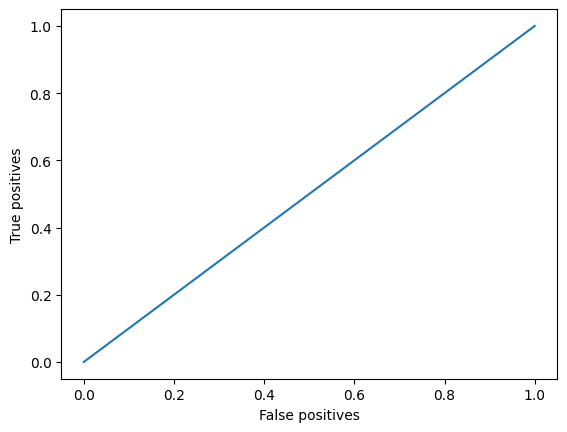

In [103]:
scoring(y_test,y_pred)
# add cfonfsuion matrix here